In [21]:
df = pd.read_csv('/content/sample_data/ai_assistant_usage_student_life.csv')

In [22]:
import numpy as np
import pandas as pd

In [23]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [24]:
df.tail()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
9995,SESSION09996,Undergraduate,Psychology,2024-07-20,28.41,5,Studying,3,Assignment Completed,True,4.2
9996,SESSION09997,High School,Business,2024-11-11,13.98,6,Writing,5,Assignment Completed,True,5.0
9997,SESSION09998,Undergraduate,Biology,2024-09-11,10.78,2,Studying,3,Idea Drafted,True,3.5
9998,SESSION09999,Undergraduate,Business,2024-10-27,30.88,7,Writing,3,Assignment Completed,False,4.3
9999,SESSION10000,Undergraduate,Math,2025-04-16,10.85,3,Writing,4,Assignment Completed,True,4.9


In [25]:
df.shape

(10000, 11)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

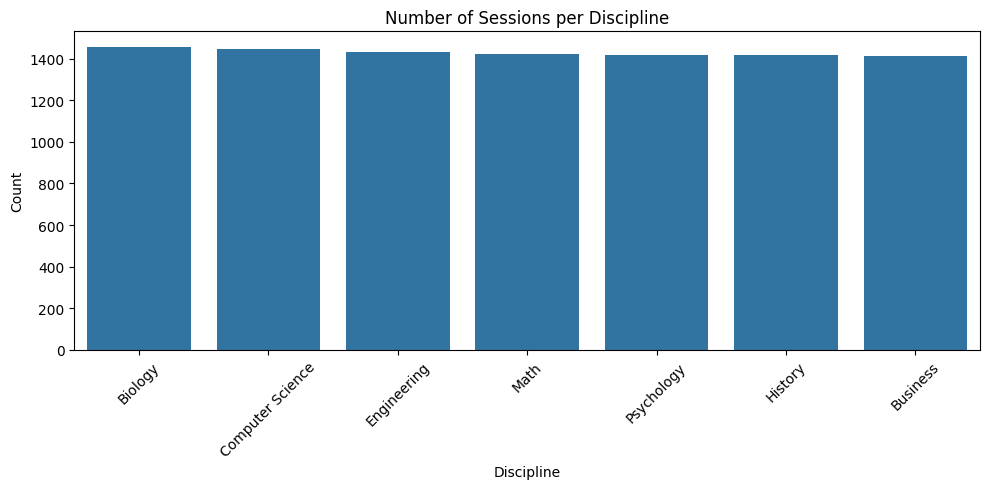

In [27]:
# Sessions by Discipline
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Discipline', order=df['Discipline'].value_counts().index)
plt.title('Number of Sessions per Discipline')
plt.xlabel('Discipline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


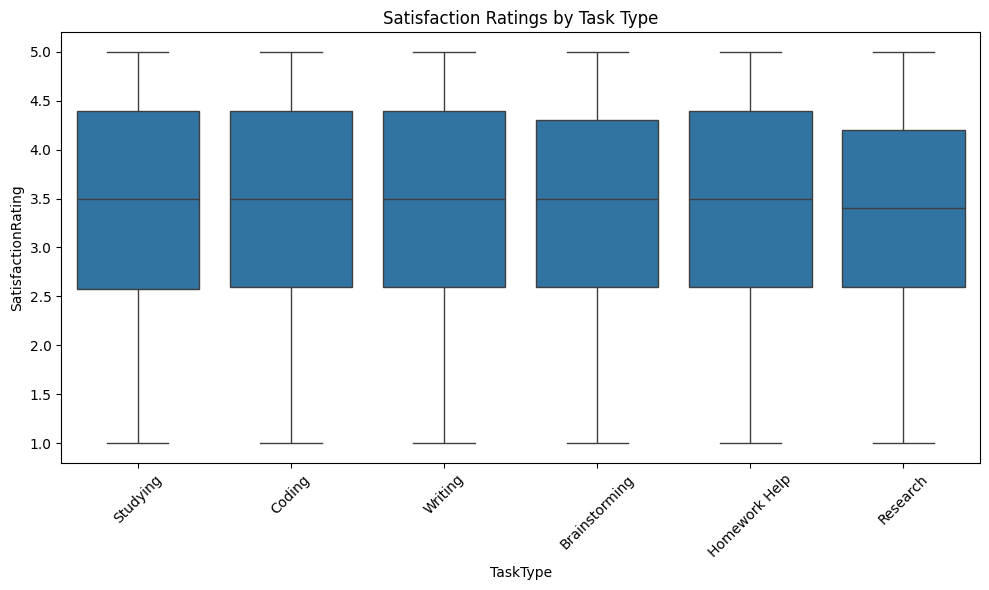

In [28]:
# TaskType vs Satisfaction Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TaskType', y='SatisfactionRating')
plt.title('Satisfaction Ratings by Task Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

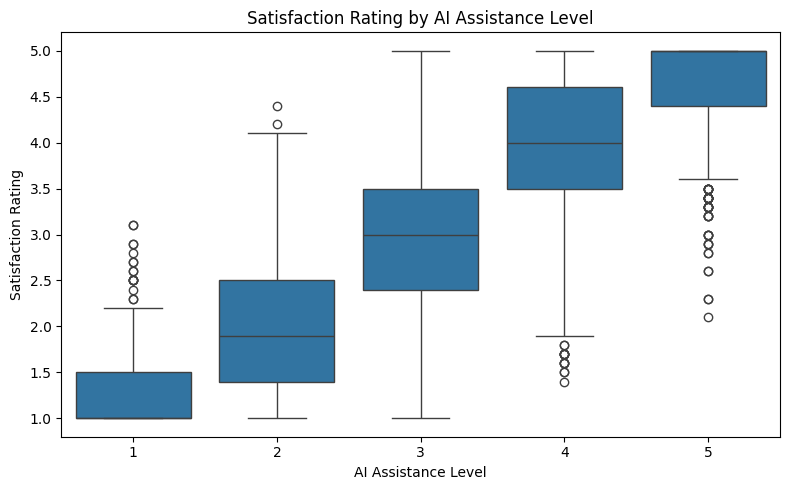

In [29]:
# AI Assistance Level vs Satisfaction Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='AI_AssistanceLevel', y='SatisfactionRating')
plt.title('Satisfaction Rating by AI Assistance Level')
plt.xlabel('AI Assistance Level')
plt.ylabel('Satisfaction Rating')
plt.tight_layout()
plt.show()

In [30]:
pip install replicate

In [31]:
!pip install git+https://github.com/ibm-granite-community/utils \
    "langchain_community<0.3.0" \
    replicate

  Cloning https://github.com/ibm-granite-community/utils to /tmp/pip-req-build-9cqs4aqk
  Running command git clone --filter=blob:none --quiet https://github.com/ibm-granite-community/utils /tmp/pip-req-build-9cqs4aqk
  Resolved https://github.com/ibm-granite-community/utils to commit ee4fa64ce4b057ca5a5b0bce3d6141b1a0432aa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [32]:
pip install numpy==1.26.0

In [49]:
from ibm_granite_community.notebook_utils import get_env_var
from langchain_community.llms import Replicate

model = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    replicate_api_token=get_env_var('REPLICATE_API_TOKEN'),
    model_kwargs={"max_tokens":1024, "temperature":0.2},
);

In [63]:
import ipywidgets as widgets
from IPython.display import display

# Define the header
header = widgets.HTML("<h2>Chatbot Asisten Akademik AI</h2>")

# Welcome message
welcome_message = widgets.HTML("Halo! Saya Asisten AI Anda. Bagaimana saya bisa membantu Anda hari ini dengan tugas akademik Anda?")

# Define a text box for user input (to simulate chat input)
user_input = widgets.Text(
    placeholder="Tanyakan tentang tugas atau bantuan AI...",
    description="Pertanyaan Anda:",
    disabled=False
)

# Define an area to display chatbot's response
chat_response = widgets.Output()

# Function to handle responses from the AI Assistant
def on_button_click(change):
    with chat_response:
        # Display the user input
        print(f"Mahasiswa: {user_input.value}")

        # AI response based on user input
        if 'manajemen waktu' in user_input.value.lower():
            print("AI: Saya dapat membantu Anda mengatur jadwal dan mengingatkan tenggat waktu untuk tugas, ujian, dan deadline.")
        elif 'stres' in user_input.value.lower():
            print("AI: Saya bisa menganalisis tingkat stres Anda dan memberikan strategi untuk mengelola tekanan akademik.")
        elif 'belajar' in user_input.value.lower():
            print("AI: Saya memberikan tips belajar, sumber daya, dan membantu menjelaskan mata pelajaran yang sulit.")
        elif 'menulis' in user_input.value.lower():
            print("AI: Saya bisa membantu dengan penulisan akademik, memberi saran struktur, dan memeriksa grammar serta gaya penulisan.")
        elif 'ujian' in user_input.value.lower():
            print("AI: Saya dapat membantu Anda mempersiapkan ujian dengan memberikan soal latihan dan merangkum materi studi penting.")
        else:
            print("AI: Saya di sini untuk membantu Anda dengan semua kebutuhan akademik. Silakan ajukan pertanyaan Anda.")

        # Clear the text input after submitting
        user_input.value = ''

# Add a button to trigger the AI response
ask_button = widgets.Button(description="Tanya")
ask_button.on_click(on_button_click)

# Layout the widgets
chat_layout = widgets.VBox([header, welcome_message, user_input, ask_button, chat_response])

# Display the chatbot interface
display(chat_layout)


In [66]:
import datetime
import ipywidgets as widgets
from IPython.display import display
import threading
import time

# Fungsi untuk mengatur pengingat otomatis
def set_reminder(change):
    try:
        # Cek apakah waktu yang diberikan sudah lengkap (dengan waktu)
        if len(reminder_time_input.value.split()) == 1:
            # Jika hanya tanggal yang diberikan, tambahkan jam default (00:00)
            reminder_time_input.value = reminder_time_input.value + " 00:00"

        # Parse tanggal dan waktu
        reminder_time = datetime.datetime.strptime(reminder_time_input.value, "%Y-%m-%d %H:%M")
        current_time = datetime.datetime.now()

        # Jika waktu pengingat sudah tercapai
        if reminder_time <= current_time:
            reminder_output.value = f"Pengingat: {reminder_message_input.value} (Tenggat waktu sudah tercapai)"
        else:
            # Hitung sisa waktu
            time_diff = reminder_time - current_time
            reminder_output.value = f"Pengingat akan muncul dalam {time_diff} detik."

            # Mulai pengingat dengan penundaan sampai waktu tercapai
            reminder_thread = threading.Thread(target=reminder_alert, args=(reminder_time,))
            reminder_thread.start()

    except ValueError:
        reminder_output.value = "Format waktu tidak valid. Gunakan format: YYYY-MM-DD HH:MM."

# Fungsi untuk menampilkan pengingat ketika waktunya tercapai
def reminder_alert(reminder_time):
    # Hitung waktu sampai pengingat
    while datetime.datetime.now() < reminder_time:
        time.sleep(1)  # Tunggu 1 detik dan cek lagi

    # Setelah waktu tercapai, tampilkan notifikasi pengingat
    with reminder_output:
        print(f"Pengingat: {reminder_message_input.value} (Tenggat waktu tercapai pada {reminder_time.strftime('%Y-%m-%d %H:%M')})")

# Input untuk pengingat
reminder_message_input = widgets.Text(description="Pesan Pengingat:")
reminder_time_input = widgets.Text(description="Tanggal dan Waktu (YYYY-MM-DD):")
reminder_button = widgets.Button(description="Setel Pengingat")
reminder_button.on_click(set_reminder)

# Output untuk menampilkan pengingat
reminder_output = widgets.Output()

# Layout
reminder_layout = widgets.VBox([reminder_message_input, reminder_time_input, reminder_button, reminder_output])
display(reminder_layout)
